<a href="https://colab.research.google.com/github/zoobibackups/screentransitions/blob/main/python_face_cahismae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 13680865_1094428597260056_803096667464118680_n (1).jpg to 13680865_1094428597260056_803096667464118680_n (1).jpg


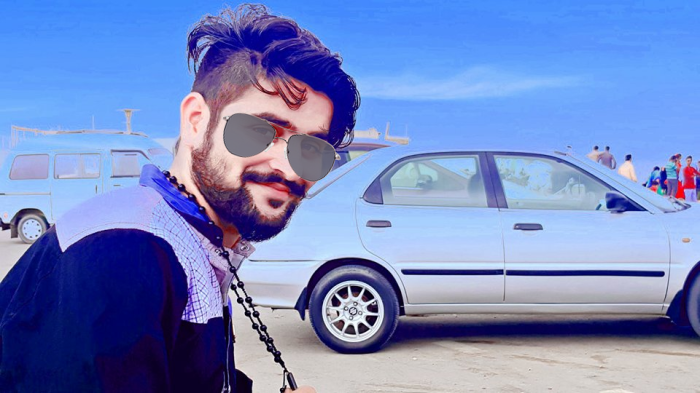

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import dlib
from scipy import ndimage
import urllib.request

#!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK
#!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2
datFile =  "/content/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(datFile)

glasses = cv2.imread("/content/sunglasses.png", -1)
def read_file(filename):
  img = cv2.imread(filename)
  #cv2_imshow(img)
  return img

def resize(img, width):
  r = float(width) / img.shape[1]
  dim = (width, int(img.shape[0] * r))
  img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
  #cv2_imshow(img)
  return img

def blend_transparent(face_img, sunglasses_img):

    overlay_img = sunglasses_img[:,:,:3]
    overlay_mask = sunglasses_img[:,:,3:]
    
    background_mask = 255 - overlay_mask

    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

#Find the angle between two points
def angle_between(point_1, point_2):
    angle_1 = np.arctan2(*point_1[::-1])
    angle_2 = np.arctan2(*point_2[::-1])
    return np.rad2deg((angle_1 - angle_2) % (2 * np.pi))

if True:
  #glasses = url_to_image("https://github.com/glennglennglenn/augmented-reality/blob/master/sunglasses.png")
  uploaded = files.upload()
  filename = next(iter(uploaded))
  img = read_file(filename)
  img = resize(img, 700)
  img_copy = img.copy()
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
  #cv2_imshow(glasses)

 
  if True:
    dets = detector(gray, 1)
        #find face box bounding points
    for d in dets:
      x = d.left()
      y = d.top()
      w = d.right()
      h = d.bottom()
    dlib_rect = dlib.rectangle(x, y, w, h)
    ##############   Find facial landmarks   ##############
    detected_landmarks = predictor(gray, dlib_rect).parts()
    landmarks = np.matrix([[p.x, p.y] for p in detected_landmarks])
    for idx, point in enumerate(landmarks):
      pos = (point[0, 0], point[0, 1])
      if idx == 0:
        eye_left = pos
      elif idx == 16:
        eye_right = pos

      try:
        degree = np.rad2deg(np.arctan2(eye_left[0] - eye_right[0], eye_left[1] - eye_right[1]))

      except:
        pass

    eye_center = (eye_left[1] + eye_right[1]) / 2
    glass_trans = int(.2 * (eye_center - y))
    face_width = w - x
    #print(face_width)
    glasses_resize = resize(glasses, face_width)
    #cv2_imshow(glasses)
    #print(glasses)
    # Rotate glasses based on angle between eyes
    yG, xG, cG = glasses_resize.shape
    glasses_resize_rotated = ndimage.rotate(glasses_resize, (degree+90))
    glass_rec_rotated = ndimage.rotate(img[y + glass_trans:y + yG + glass_trans, x:w], (degree+90))
    #blending with rotation
    h5, w5, s5 = glass_rec_rotated.shape
    rec_resize = img_copy[y + glass_trans:y + h5 + glass_trans, x:x + w5]
    blend_glass3 = blend_transparent(rec_resize , glasses_resize_rotated)
    img_copy[y + glass_trans:y + h5 + glass_trans, x:x+w5 ] = blend_glass3
    #cv2.imshow('Output', img_copy)
    cv2_imshow(img_copy)
  elif False:
     print("Exception")





# New Section